In [1]:
import os
import requests
import pandas as pd
import numpy as np
#import json

import glob

from pathlib import Path
import csv

from dotenv import load_dotenv
load_dotenv()

import pandas_datareader as web
import datetime as dt

# import panel as pn
# from panel.interact import interact
# import plotly.express as px
# pn.extension("plotly")

%matplotlib inline

In [2]:
header = "SETTLEMENT DATE|CUSIP|SYMBOL|QUANTITY (FAILS)|DESCRIPTION|PRICE"

path = r'C:\Users\watso\Desktop\TherinFintech\GME_Shenanigans\FilesCSV' # use your path
all_files = glob.glob(path + "/*.csv")

GME_CUSIP_number = "36467W109"   
GME_symbol = 'GME'
CUSIP_number = "36467W109"   # Default  
symbol = 'GME'               # Default

def read_ftd_file(csv_path, cusip_number, symbol):
    data = pd.read_csv(
    Path(csv_path),
    index_col=False
    )
    
    #header = "SETTLEMENT DATE|CUSIP|SYMBOL|QUANTITY (FAILS)|DESCRIPTION|PRICE"
    data[header] = data[header].str.replace('|',',')
    new_data = data.rename(columns={header:'SETTLEMENT_DATE,CUSIP,SYMBOL,QUANTITY_FAILS,DESCRIPTION,PRICE'})
    Header = "Header"
    new_data = data.rename(columns={header:Header})
    
    #new_df = pd.DataFrame()     - not needed apparently 
    new_data = new_data.Header.str.split(",",expand=True)
    new_data = new_data.rename(columns={0:'Date',1:'CUSIP',2:'SYMBOL',3:'QUANTITY_FAILS',4:'DESCRIPTION',5:'PRICE'})
    
    new_data = new_data.set_index("CUSIP")
    new_data = new_data.loc[cusip_number]
    
    new_data = new_data[['Date','QUANTITY_FAILS','PRICE']]
    new_data.rename(columns={'PRICE':symbol},inplace=True)
    new_data.set_index('Date',inplace=True)  
    
    new_data = new_data.reset_index()
    new_data['Date'] = pd.to_datetime(new_data['Date'])
    new_data.set_index('Date',inplace=True)
    new_data = new_data[['QUANTITY_FAILS']]
    new_data.rename(columns={'QUANTITY_FAILS':symbol+'_QUANTITY_FAILS'},inplace=True)
    
    return new_data

def read_ftd_data_any_stock(cusip_number,symbol):
    new_df = pd.DataFrame()
    for filename in all_files:
        if filename == 0:
            new_df = read_ftd_file(csv_path=filename ,cusip_number=cusip_number,symbol=symbol)
        else:
            new_df2 = read_ftd_file(csv_path=filename ,cusip_number=cusip_number,symbol=symbol)
            new_df = concat_df(new_df,new_df2)
            
    return new_df

def fix_dataframe(dataframe):
    dataframe.to_csv('Resources/temp.csv')
    dataframe = pd.read_csv(
        Path("Resources/temp.csv"),
        infer_datetime_format=True,
        parse_dates=True,
        index_col="Date",
    )
    dataframe.sort_index(inplace=True)
    return dataframe

def return_dataframe(cusip_number,symbol):
    df = read_ftd_data_any_stock(cusip_number,symbol)
    df = fix_dataframe(df)
    return df

def concat_df(df_1,df_2):
    df = pd.concat([df_1,df_2],axis='rows')
    return df

In [3]:
csv_file_1 = Path("Resources/sec_ftd_202012a.csv")
csv_file_2 = Path("Resources/sec_ftd_202012b.csv")
csv_file_3 = Path("Resources/sec_ftd_202101a.csv")
csv_file_4 = Path("Resources/sec_ftd_202101b.csv")
csv_file_5 = Path("Resources/sec_ftd_202102a.csv")
csv_file_6 = Path("Resources/sec_ftd_202102b.csv")
csv_file_7 = Path("Resources/sec_ftd_202103a.csv")
csv_file_8 = Path("Resources/sec_ftd_202103b.csv")
csv_file_9 = Path("Resources/sec_ftd_202104a.csv")
csv_file_10= Path("Resources/sec_ftd_202104b.csv")
csv_file_11= Path("Resources/sec_ftd_202105a.csv")
csv_file_12= Path("Resources/sec_ftd_202105b.csv")
csv_file_13= Path("Resources/sec_ftd_202106a.csv")
csv_file_14= Path("Resources/sec_ftd_202106b.csv")
csv_file_15= Path("Resources/sec_ftd_202107a.csv")
csv_file_16= Path("Resources/sec_ftd_202107b.csv")
csv_file_17= Path("Resources/sec_ftd_202108a.csv")
csv_file_18= Path("Resources/sec_ftd_202108b.csv")

csv_list = [
    csv_file_1,csv_file_2,csv_file_3,csv_file_4,csv_file_5,  \
    csv_file_6,csv_file_7,csv_file_8,csv_file_9,csv_file_10, \
    csv_file_11,csv_file_12,csv_file_13,csv_file_14,csv_file_15, \
    csv_file_16,csv_file_17,csv_file_18
]

In [4]:
# import pandas as pd
# import glob

# path = r'C:\DRO\DCL_rawdata_files' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
# C:\Users\watso\Desktop\TherinFintech\GME_Shenanigans\FilesCSV


# li = []


# for filename in all_files:
#     gme_df_test_new_1 = pd.DataFrame()
#     if filename == 0:
#         gme_df_test_new_1 = read_ftd_file(csv_path=filename ,cusip_number=CUSIP_number,symbol=symbol)
#     #df = pd.read_csv(filename, index_col=None, header=0)
#     #li.append(gme_df_test_new)
#     else:
#         gme_df_test_new_2 = read_ftd_file(csv_path=filename ,cusip_number=CUSIP_number,symbol=symbol)
#         gme_df_test_new_1 = concat_df(gme_df_test_new_1,gme_df_test_new_2)

# # frame = pd.concat(li, axis=0, ignore_index=True)
# # frame.head()
# #gme_df_test_new_1


In [6]:
# CUSIP_number = "36467W109"   # Defaults  
# symbol = 'GME'   

gme_df_1 = read_ftd_file(csv_path=csv_file_1 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_2 = read_ftd_file(csv_path=csv_file_2 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_3 = read_ftd_file(csv_path=csv_file_3 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_4 = read_ftd_file(csv_path=csv_file_4 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_5 = read_ftd_file(csv_path=csv_file_5 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_6 = read_ftd_file(csv_path=csv_file_6 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_7 = read_ftd_file(csv_path=csv_file_7 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_8 = read_ftd_file(csv_path=csv_file_8 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_9 = read_ftd_file(csv_path=csv_file_9 ,cusip_number=CUSIP_number,symbol=symbol)
gme_df_10= read_ftd_file(csv_path=csv_file_10,cusip_number=CUSIP_number,symbol=symbol)
gme_df_11= read_ftd_file(csv_path=csv_file_11,cusip_number=CUSIP_number,symbol=symbol)
gme_df_12= read_ftd_file(csv_path=csv_file_12,cusip_number=CUSIP_number,symbol=symbol)
gme_df_13= read_ftd_file(csv_path=csv_file_13,cusip_number=CUSIP_number,symbol=symbol)
gme_df_14= read_ftd_file(csv_path=csv_file_14,cusip_number=CUSIP_number,symbol=symbol)
gme_df_15= read_ftd_file(csv_path=csv_file_15,cusip_number=CUSIP_number,symbol=symbol)
gme_df_16= read_ftd_file(csv_path=csv_file_16,cusip_number=CUSIP_number,symbol=symbol)
gme_df_17= read_ftd_file(csv_path=csv_file_17,cusip_number=CUSIP_number,symbol=symbol)
gme_df_18= read_ftd_file(csv_path=csv_file_18,cusip_number=CUSIP_number,symbol=symbol)

C:\Users\watso\AppData\Local\Temp/ipykernel_20916/1969180821.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[header] = data[header].str.replace('|',',')


In [7]:
gme_df = concat_df(gme_df_1,gme_df_2)
gme_df = concat_df(gme_df,gme_df_3)
gme_df = concat_df(gme_df,gme_df_4)
gme_df = concat_df(gme_df,gme_df_5)
gme_df = concat_df(gme_df,gme_df_6)
gme_df = concat_df(gme_df,gme_df_7)
gme_df = concat_df(gme_df,gme_df_8)
gme_df = concat_df(gme_df,gme_df_9)
gme_df = concat_df(gme_df,gme_df_10)
gme_df = concat_df(gme_df,gme_df_11)
gme_df = concat_df(gme_df,gme_df_12)
gme_df = concat_df(gme_df,gme_df_13)
gme_df = concat_df(gme_df,gme_df_14)
gme_df = concat_df(gme_df,gme_df_15)
gme_df = concat_df(gme_df,gme_df_16)
gme_df = concat_df(gme_df,gme_df_17)
gme_df = concat_df(gme_df,gme_df_18)
#gme_df = concat_df(gme_df,gme_df_19)

#gme_df = return_dataframe(GME_CUSIP_number,GME_symbol)

In [8]:
gme_df = fix_dataframe(gme_df)    # Reference DataFrame via raw data 

In [9]:
gme_final_test = return_dataframe(CUSIP_number,'GME')
gme_final_test

C:\Users\watso\AppData\Local\Temp/ipykernel_20916/1969180821.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[header] = data[header].str.replace('|',',')


,GME_QUANTITY_FAILS
Date,
2020-09-01,310668
2020-09-02,917224
2020-09-03,783719
2020-09-04,1048386
2020-09-08,556234
...,...
2021-08-24,7278
2021-08-25,2363
2021-08-26,10983


In [10]:
tsla_cusip = "88160R101" 
tsla_test = return_dataframe(tsla_cusip,'TSLA')
tsla_test

C:\Users\watso\AppData\Local\Temp/ipykernel_20916/1969180821.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[header] = data[header].str.replace('|',',')


,TSLA_QUANTITY_FAILS
Date,
2020-09-01,18837
2020-09-02,1240984
2020-09-03,639
2020-09-04,169
2020-09-08,2691
...,...
2021-08-25,3833
2021-08-26,5361
2021-08-27,1949


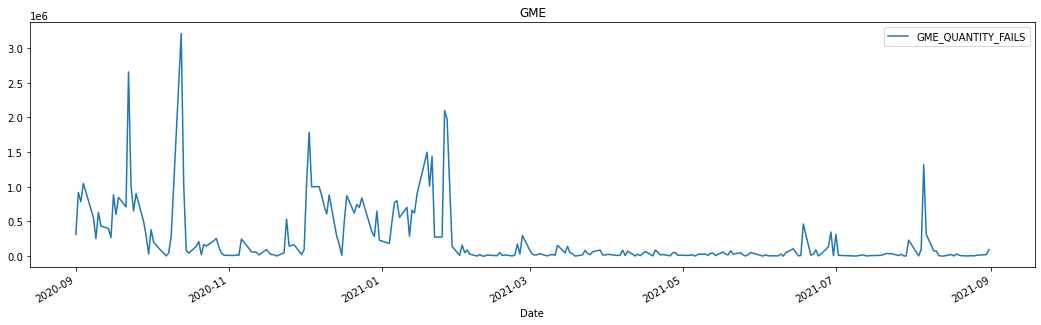

In [11]:
gme_ftd_df = gme_final_test
tsla_ftd_df = tsla_test

def plot_fails(data,symbol):
    plot = data.plot(figsize=(18,5),title=symbol)
    return plot 

gme_ftd_plot = plot_fails(gme_ftd_df,"GME")

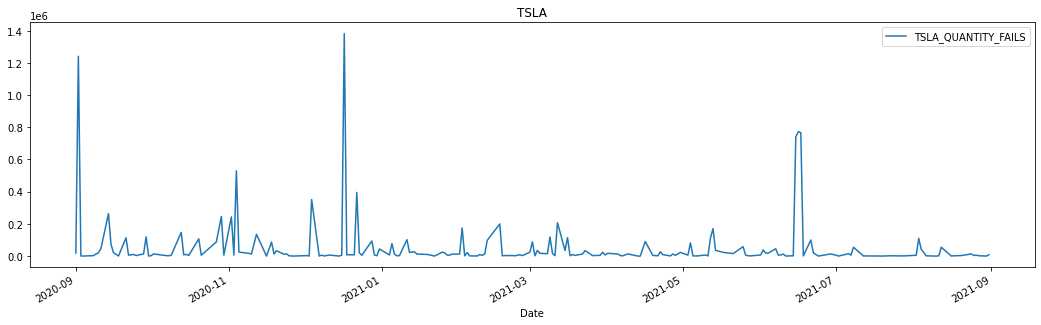

In [12]:
tsla_ftd_plot = plot_fails(tsla_ftd_df,"TSLA")